# Phase 3 Code Challenge Review

Made using resources from the Seattle team - thanks y'all.

## Overview

* Gradient Descent
* Logistic Regression
* Classification Metrics
* Decision Trees

In [6]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [ ]:
# from src.call import call_on_students

## Part 1: Gradient Descent

### Set Up

In [2]:
# Grab the data from 'auto-mpg.csv'
mpg_df = pd.read_csv("data/auto-mpg.csv")

In [3]:
# Explore the data
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


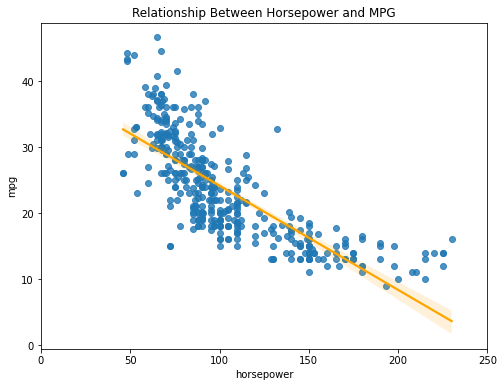

In [4]:
# Let's plot a simple linear regression line using just the horsepower column
plt.figure(figsize=(8, 6))
sns.regplot(x='horsepower', y='mpg', data=mpg_df, line_kws={"color":"orange"})
plt.title('Relationship Between Horsepower and MPG')
plt.xlim(0, 250)
plt.show()

The above graph shows an approximate best fit line for the relationship between `horsepower` and `mpg` in our data.


### 1) Describe the below chart: What is it showing? What does it tell us?

![Slope-RSS relationship image](completed/images/slope-rss-relationship.png)

In [ ]:
# call_on_students(1)

#### Answer: 

- Relationship between possible slopes and Residual Sum of Squares (error of linear graph)

- Lowest point on curve is the lowest RSS, therefore, equals slope of line of best fit (


### 2) Imagine that you're starting at a slope towards the top upper left corner. Using Zoom's annotate feature, demonstrate how gradient descent would work 

In [ ]:
# call_on_students(1)

* To find the minimum value, we need to find where the partial derivative = 0

* We can approach this using the gradient descent-- we look at the "slopes" of various steps in the graph; based 

*Step size based on partial derivative of the curve
 * How much of the graph are we going to take



### 3) What is a step size when talking about gradient descent? How does learning rate regulate step size?

In [ ]:
# call_on_students(1)

In [ ]:
* Step size is how far/large a step to take in the next gradient descent to try
* Learning rate is a proportion that dictates how big the step size should be
 * Learning rate adjusts to 

#### Answer: 

- 


## Part 2: Logistic Regression

### 4) Describe a logistic regression model:

- What kind of target is a logistic regression model used for?
- What are the predictions that a logistic regression model outputs?
- How is it different from linear regression?
- Is it a parametric or non-parametric model?

In [5]:
# call_on_students(1)

#### Answer: 

* Target = categorical variables (distinct) -- classes
* Output = probability of output belonging to a specific class
* Logreg = categorical outcome, linreg = continuous outcome
* Parametric

### 5) Compare a logistic regression model to any of the other model types we've learned:

- List one benefit of logistic regression when compared to the other model type
- List one reason the other model type might be more useful

In [ ]:
# call_on_students(1)

#### Answer: 

Compare to Decision Trees, KNN, or Random Forest

Pro:
- Less prone to overfitting compared to decision trees
- More interpretable (coefficients)

Con:
- doesn't handle imbalanced data well
- doesn't deal with multicollinearity well


## Part 3: Logistic Regression and Classification Metrics with Code

### Set Up

In [8]:
# Let's use the same data, but now with a classification target
mpg_class = pd.read_csv('data/auto-mpg-classification.csv')

In [9]:
# Check this new dataframe out
mpg_class.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,target
0,8,307.0,130,3504,12.0,70,1,0
1,8,350.0,165,3693,11.5,70,1,1
2,8,318.0,150,3436,11.0,70,1,0
3,8,304.0,150,3433,12.0,70,1,1
4,8,302.0,140,3449,10.5,70,1,1


### 6) Prepare our data for modeling:

1. Perform a train/test split
2. Scale the inputs


In [ ]:
# call_on_students(1)

In [12]:
# Train-test split
# Set test_size=0.33 and random_state=42

X = mpg_class.drop('target', axis=1)
y = mpg_class.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)


In [13]:
# Scale the data

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 7) Explore the `target` column and our model-less baseline

1. What is the breakdown of the `target` column in our training data?
2. What would a model-less baseline look like in this context?
3. How accurate would that model-less understanding be on our test data?

In [ ]:
# call_on_students(1)

#### Part 1: explore the target column breakdown in train data

In [16]:
# Code to explore

y_train.value_counts(normalize=True)

0    0.744275
1    0.255725
Name: target, dtype: float64

#### Answer:

- 


#### Part 2: What would a model-less baseline look like in this context?

#### Answer:

- predict whatever the majority class is (this case = 0) will yield ~75% accuracy (percentage)


#### Part 3: How accurate would that baseline be on test data?


In [17]:
# Code to find the answer
y_test.value_counts(normalize=True)

0    0.753846
1    0.246154
Name: target, dtype: float64

#### Answer:

- 


### 8) What is one problem you could foresee based on this breakdown, and what is one strategy you could employ to address that problem?

In [ ]:
# call_on_students(1)

#### Answer:

- Problem: class imbalance

Strategies:
1) SMOTE
 * oversample minority class
 * undersampling majority class not recommended due to amount of data
 
2) Class Weights

### 9) Fit a logistic regression model, and plot a confusion matrix of the results on our test set

In [ ]:
# call_on_students(1)

In [19]:
# Fit a logistic regression model
# Name the model `logreg` and set random_state = 42
logreg = LogisticRegression(random_state = 42)

In [20]:
logreg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

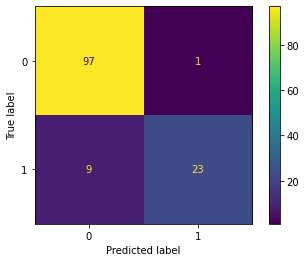

In [21]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(logreg, X_test_scaled, y_test);

### 10) Calculate the accuracy, precision, recall and f1-score for the test set

You can use the confusion matrix above, or sklearn functions

In [ ]:
# call_on_students(1)

In [ ]:
tp = 23
tn = 97
fp = 1
fn = 9

In [22]:
y_pred = logreg.predict(X_test_scaled)

In [23]:
# Accuracy
accuracy_score(y_test, y_pred)

# By Hand:
(tp + tn) / (tp + tn + fp + fn)

# Or also:
logreg.score(X_test_scaled, y_test)

0.9230769230769231

In [24]:
# Precision:
precision_score(y_test, y_pred)

#By Hand:
tp / (tp + fp)

0.9583333333333334

In [ ]:
# Recall
recall_score(y_test, y_pred)

#By hand:
tp / (tp + fn)


In [ ]:
# F1-Score
f1_score(y_test, y_pred)

(2*tp)/(2*tp + fp + fn)

### 11) Calculate the ROC-AUC on the test set, and plot the ROC curve

For this you'll definitely want to use the sklearn functions!

In [ ]:
# call_on_students(1)

In [ ]:
y_score = logreg.predict_proba(X_test_scaled)[:,1]

In [30]:
# Calculate roc-auc

roc_auc_score(y_test, y_score)

0.9811862244897959

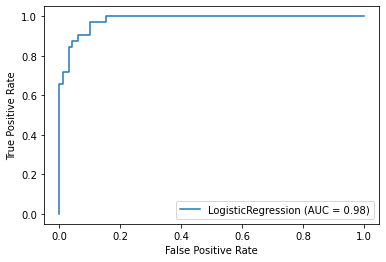

In [29]:
# Plot the ROC curve
plot_roc_curve(logreg, X_test_scaled, y_test)

### 12) Evaluate! Based on the metrics of our test data, how is our model doing?

In [ ]:
# call_on_students(1)

#### Answer:

- Looks good!


## Part 4: Decision Trees

### Set Up - Generating 1-split trees to compare

In [36]:
# Creating two different decision trees with a single split
dt_maxdepth1_v1 = DecisionTreeClassifier(max_depth=1, random_state = 42)
dt_maxdepth1_v2 = DecisionTreeClassifier(max_depth=1, random_state = 42)

# Training the two trees on different columns
dt_maxdepth1_v1.fit(X_train[['weight']], y_train)
dt_maxdepth1_v2.fit(X_train[['origin']], y_train)

DecisionTreeClassifier(max_depth=1, random_state=42)

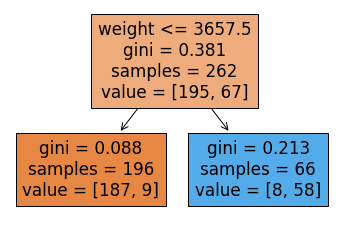

In [37]:
# Tree based on 1st column
plot_tree(dt_maxdepth1_v1, feature_names=['weight'], filled=True);

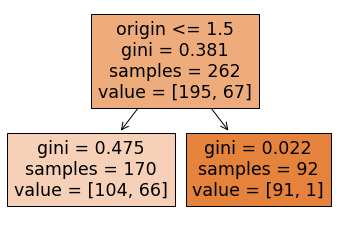

In [38]:
# Tree based on 2nd column
plot_tree(dt_maxdepth1_v2, feature_names=['origin'], filled=True);

#### Result: 

(showing the image output incase there is a problem with the above code to generate and visualize these trees)

| Version 1: Weight | Version 2: Origin |
| ----------------- | ----------------- |  
| ![max depth 1 - version 1](completed/images/dt-maxdepth1-v1.png) | ![max depth 1 - version 2](completed/images/dt-maxdepth1-v2.png) |

### 13) Which of these trees does a better job splitting the data? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

Tree #1. Because Tree #2 has a higher gini score (0.475)

### 14) Fit a decision tree model, and plot a confusion matrix of the results on our test set

In [ ]:
# call_on_students(1)

In [59]:
dect = DecisionTreeClassifier(random_state=42)

dect.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

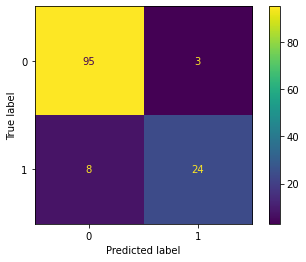

In [60]:
plot_confusion_matrix(dect, X_test, y_test);

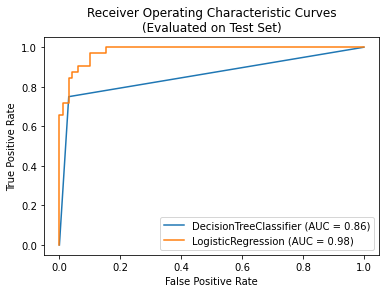

In [62]:
fig, ax = plt.subplots()
plot_roc_curve(dect, X_test, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

In [56]:
# Fit a decision tree model
# Name the model `dt` and set random_state = 42
dt_scaled = DecisionTreeClassifier(random_state=42)

dt_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

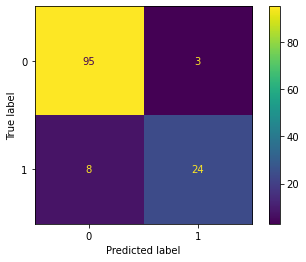

In [57]:
# Plot a confusion matrix on the test data
plot_confusion_matrix(dt_scaled, X_test_scaled, y_test);

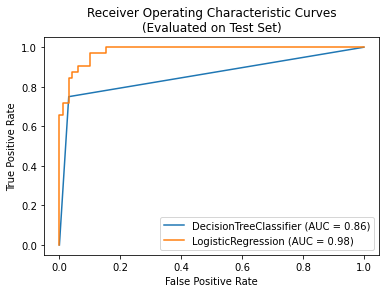

In [58]:
# Code to visualize the ROC curves for the models we've done
fig, ax = plt.subplots()
plot_roc_curve(dt_scaled, X_test_scaled, y_test, ax=ax)
plot_roc_curve(logreg, X_test_scaled, y_test, ax=ax)

plt.title("Receiver Operating Characteristic Curves\n(Evaluated on Test Set)")
plt.show()

### 15) Which is the better model according to ROC-AUC score? How can you tell?

In [ ]:
# call_on_students(1)

#### Answer:

- Logistic Regression, higher AUC
